# Titanic Spaceship : KNN Algorithm and Logistic Regression with Gradient Descent from Scratch

Hila Masturov 318568110 , Inbar Sarel Barhom 301805362

This Jupyter notebook is designed to tackle the "Titanic Spaceship" challenge, involves predicting survival outcomes for passengers on a spaceship similar to the Titanic. The notebook implements two powerful machine learning techniques: K-Nearest Neighbors (KNN) algorithm and Logistic Regression using Gradient Descent. Both algorithms are implemented from scratch, providing a comprehensive understanding of their inner workings. By leveraging these models, this notebook aims to accurately predict the survival probabilities of passengers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Loading the data 
df = pd.read_csv("data.csv")
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
# Split the data into features (X) and target variable (y)
X = df.drop('Transported', axis=1)
y = df['Transported']

In [4]:
# Split the data into train and test sets
# We chose to split the data to 67% for the train set and 33% for the test set
# We used train_test_split finction from sklearn.model_selection library to do so.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [5]:
# Print the shapes of the train and test sets
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (5824, 13)
Test set shape: (2869, 13)


In [6]:
# Check the amount of missing values in each feature
print('TRAIN SET MISSING VALUES:')
print(X_train.isna().sum())
print('')
print('TEST SET MISSING VALUES:')
print(X_test.isna().sum())

TRAIN SET MISSING VALUES:
PassengerId       0
HomePlanet      133
CryoSleep       144
Cabin           134
Destination     118
Age             125
VIP             150
RoomService     106
FoodCourt       113
ShoppingMall    142
Spa             118
VRDeck          126
Name            135
dtype: int64

TEST SET MISSING VALUES:
PassengerId      0
HomePlanet      68
CryoSleep       73
Cabin           65
Destination     64
Age             54
VIP             53
RoomService     75
FoodCourt       70
ShoppingMall    66
Spa             65
VRDeck          62
Name            65
dtype: int64


# Missing values

In [7]:
# We filled the missing values in these columns with 0 for both the training and testing datasets 
# assuming that if the value is missing,
# it means the corresponding feature is not available for that passenger
X_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = X_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)
X_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = X_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

# For the 'Age' column we filled the missing values with the median age of the training and testing datasets.
X_train['Age'] =X_train['Age'].fillna(X_train['Age'].median())
X_test['Age'] =X_test['Age'].fillna(X_test['Age'].median())

# For the missing values in the 'VIP' column we used False for both the training and testing datasets.
# assuming that if the value is missing, the passenger is not a VIP
X_train['VIP'] =X_train['VIP'].fillna(False)
X_test['VIP'] =X_test['VIP'].fillna(False)

# For the missing values in the 'HomePlanet' column we used 'Mars' for both the training and testing datasets. 
# The reason of choosing "Mars" is because it has less effect on the decision of whether the passenger was transported or not. 
# We can see this later in the analysis of the data.
X_train['HomePlanet'] =X_train['HomePlanet'].fillna('Mars')
X_test['HomePlanet'] =X_test['HomePlanet'].fillna('Mars')

# For the missing values in the 'Destination' column we used "PSO J318.5-22" 
# The decision to fill the missing data with "PSO J318.5-22" is based on the same decision from before
# "PSO J318.5-22" has less effect on the transported passengers
# # We can see this later in the analysis of the data.
X_train['Destination']=X_train['Destination'].fillna("PSO J318.5-22")
X_test['Destination']=X_test['Destination'].fillna("PSO J318.5-22")

# For the missing values in the 'CryoSleep' column we used False 
X_train['CryoSleep'] =X_train['CryoSleep'].fillna(False)
X_test['CryoSleep'] =X_test['CryoSleep'].fillna(False)

# A random default value was chosen to fill the missing data of the "Cabin" column
X_train['Cabin'] =X_train['Cabin'].fillna('T/0/P')
X_test['Cabin'] =X_test['Cabin'].fillna('T/0/P')

# Data analysis & Feature Engineering

Exploring Age distribution

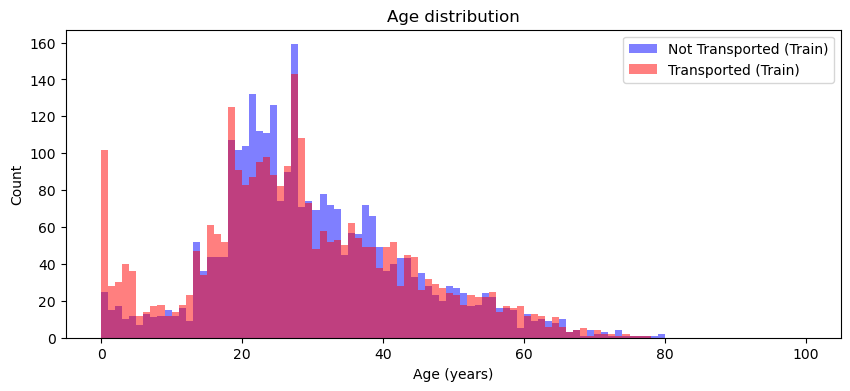

In [8]:
# Figure size
plt.figure(figsize=(10, 4))

# Histogram for Not Transported
plt.hist(X_train[y_train == 0]['Age'], bins=range(0, 101, 1), alpha=0.5, color='blue', label='Not Transported (Train)')

# Histogram for Transported
plt.hist(X_train[y_train == 1]['Age'], bins=range(0, 101, 1), alpha=0.5, color='red', label='Transported (Train)')


plt.title('Age distribution')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.legend()

plt.show()

* 0-18 year olds were more likely to be transported than not.
* 18-25 year olds were less likely to be transported than not.
* Over 25 year olds were about equally likely to be transported than not.

Adding new "Age_group" feature
that can help us get more accurate results in the prediction since the age has an effect for the likelihood of the trasported passengers.

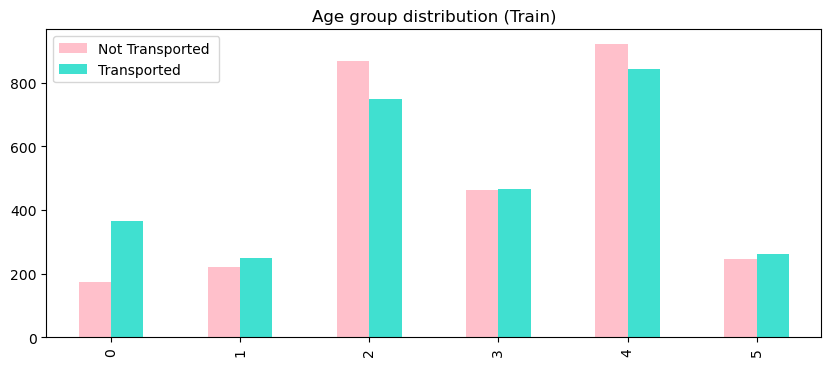

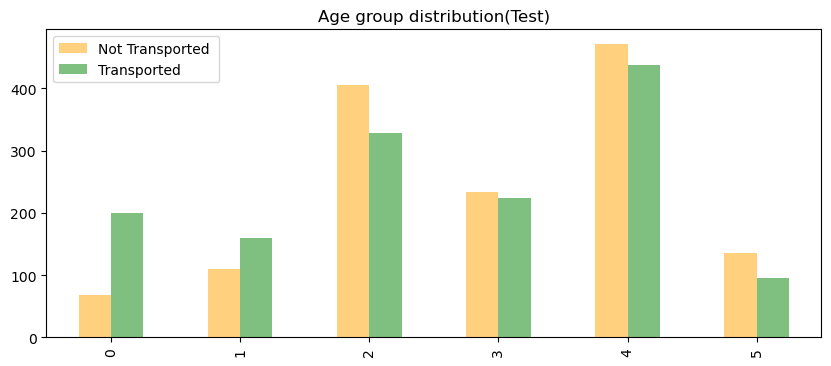

In [9]:
# New age feature - training set
X_train['Age_group'] =  X_train['Age'].astype(int)
X_train.loc[X_train['Age']<=12,'Age_group']=0
X_train.loc[(X_train['Age']>12) & (X_train['Age']<18),'Age_group']=1
X_train.loc[(X_train['Age']>=18) & (X_train['Age']<=25),'Age_group']=2
X_train.loc[(X_train['Age']>25) & (X_train['Age']<=30),'Age_group']=3
X_train.loc[(X_train['Age']>30) & (X_train['Age']<=50),'Age_group']=4
X_train.loc[X_train['Age']>50,'Age_group']=5

# New age feature - test set
X_test['Age_group'] =  X_test['Age'].astype(int)
X_test.loc[X_test['Age']<=12,'Age_group']=0
X_test.loc[(X_test['Age']>12) & (X_test['Age']<18),'Age_group']=1
X_test.loc[(X_test['Age']>=18) & (X_test['Age']<=25),'Age_group']=2
X_test.loc[(X_test['Age']>25) & (X_test['Age']<=30),'Age_group']=3
X_test.loc[(X_test['Age']>30) & (X_test['Age']<=50),'Age_group']=4
X_test.loc[X_test['Age']>50,'Age_group']=5

# Plot distribution of Age_group
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1, 1, 1)
age_group_counts_train = X_train.groupby(['Age_group', y_train]).size().unstack()
age_group_counts_train.plot(kind='bar', stacked=False, ax=ax, color=['pink', 'turquoise'])
ax.set_title('Age group distribution (Train)')
ax.legend(['Not Transported ', 'Transported '])
ax.set_xlabel('')
plt.show()

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1, 1, 1)
age_group_counts_test = X_test.groupby(['Age_group', y_test]).size().unstack()
age_group_counts_test.plot(kind='bar', stacked=False, ax=ax, color=['orange', 'green'], alpha=0.5)
ax.set_title('Age group distribution(Test)')
ax.legend(['Not Transported ', 'Transported '])
ax.set_xlabel('')
plt.show()

exploring how 'HomePlanet', 'CryoSleep', 'Destination', 'VIP' features can help us optimize our conclusions

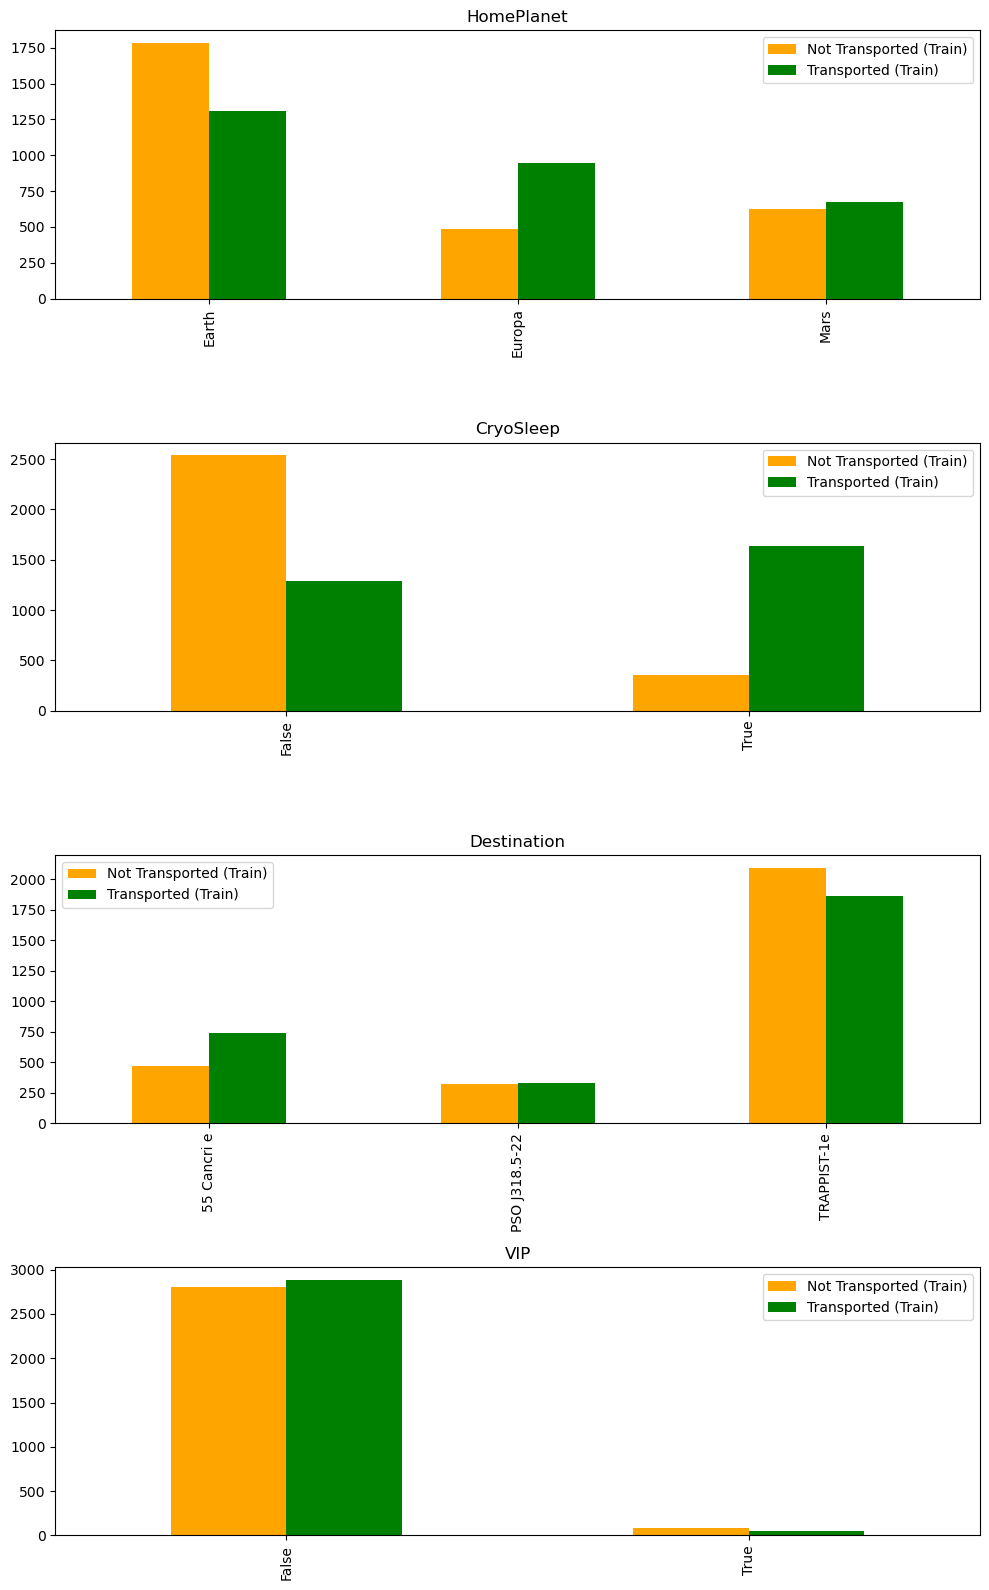

In [10]:
# Other features
feats = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot features
fig = plt.figure(figsize=(10, 16))
for i, var_name in enumerate(feats):
    ax = fig.add_subplot(4, 1, i + 1)
    transported_counts_train = X_train.groupby([var_name, y_train]).size().unstack()
    transported_counts_train.plot(kind='bar', stacked=False, ax=ax, color = ['orange', 'green'])
    ax.set_title(var_name)
    ax.legend(['Not Transported (Train)', 'Transported (Train)'])
    ax.set_xlabel('')
fig.tight_layout() 
plt.show()

from the plot of VIP we can see that the split is equal, to prevent overfitting we decided to drop the feature.

In [11]:
X_train.drop(["VIP","Name"],axis = 1,inplace = True)
X_test.drop(["VIP","Name"],axis = 1,inplace = True)


we chose to extract the group number and find which passengerers travel alone

after extracting the group from the PassengerId column 
and creating a new feture that indicates if the passenger is traveling alone
we have no use in the PassengerId column and we can drop it.

In [12]:
X_train['Group'] = X_train.PassengerId.str.extract('(\d+)\_',expand = False)
group_counts = X_train['Group'].value_counts()
X_train['TravelingAlone'] = X_train['Group'].apply(lambda x:1 if group_counts[x] == 1 else 0)

X_train.drop(["PassengerId","Group"],axis = 1,inplace = True)
X_train

X_test['Group'] = X_test.PassengerId.str.extract('(\d+)\_',expand = False)
group_counts_t = X_test['Group'].value_counts()
X_test['TravelingAlone'] = X_test['Group'].apply(lambda x:1 if group_counts_t[x] == 1 else 0)


X_test.drop(["PassengerId","Group"],axis = 1,inplace = True)
X_test



,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Age_group,TravelingAlone
304,Mars,False,F/63/S,TRAPPIST-1e,19.0,417.0,349.0,634.0,3.0,1057.0,2,0
2697,Earth,False,G/460/S,TRAPPIST-1e,18.0,4.0,904.0,0.0,0.0,1.0,2,1
8424,Earth,True,G/1449/S,TRAPPIST-1e,41.0,0.0,0.0,0.0,0.0,0.0,4,1
1672,Earth,False,G/291/P,TRAPPIST-1e,35.0,0.0,338.0,436.0,0.0,0.0,4,1
8458,Europa,True,D/288/P,TRAPPIST-1e,43.0,0.0,0.0,0.0,0.0,0.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7120,Europa,True,C/281/S,TRAPPIST-1e,19.0,0.0,0.0,0.0,0.0,0.0,2,0
3880,Europa,True,B/132/P,55 Cancri e,45.0,0.0,0.0,0.0,0.0,0.0,4,0
6481,Earth,False,F/1307/S,TRAPPIST-1e,36.0,1912.0,0.0,0.0,2.0,0.0,4,1
63,Earth,False,F/15/S,55 Cancri e,21.0,1946.0,37.0,0.0,0.0,24.0,2,0


Using 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' to create 2 new features that will indicate how much money the passengers spent called "luxury" and another feature called 'Non_Luxury' that will provide us with the information about the passengers that didn't spent money at all

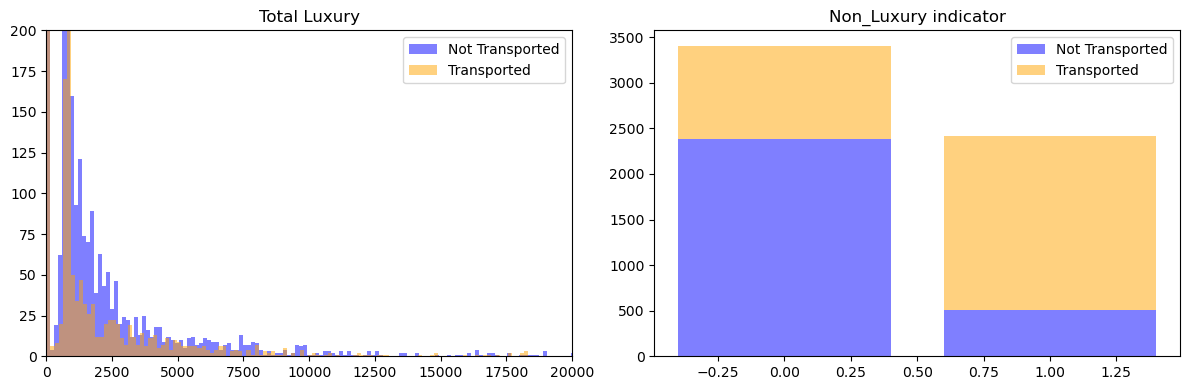

In [13]:
# New Luxury feature
luxury=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# training set
X_train['Luxury']=X_train[luxury].sum(axis=1)
X_train['Non_Luxury']=(X_train['Luxury']==0).astype(int)

# New features - test set
X_test['Luxury']=X_test[luxury].sum(axis=1)
X_test['Non_Luxury']=(X_test['Luxury']==0).astype(int)

# Plot distribution of new features
fig = plt.figure(figsize=(12, 4))

# Subplot 1 - Total Luxury
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(X_train.loc[y_train == 0, 'Luxury'], bins=200, color='blue', alpha=0.5, label='Not Transported')
ax1.hist(X_train.loc[y_train == 1, 'Luxury'], bins=200, color='orange', alpha=0.5, label='Transported')
ax1.set_title('Total Luxury')
ax1.set_ylim([0, 200])
ax1.set_xlim([0, 20000])
ax1.legend()

# Subplot 2 - Non_Luxury indicator
ax2 = fig.add_subplot(1, 2, 2)
transported_counts = X_train.groupby(['Non_Luxury', y_train]).size().unstack()
ax2.bar(transported_counts.index, transported_counts.iloc[:, 0], color='blue', alpha=0.5)
ax2.bar(transported_counts.index, transported_counts.iloc[:, 1], bottom=transported_counts.iloc[:, 0], color='orange', alpha=0.5)
ax2.set_title('Non_Luxury indicator')
ax2.legend(['Not Transported', 'Transported'])
ax2.set_xlabel('')

fig.tight_layout()
plt.show()

In [14]:
X_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Age_group,TravelingAlone,Luxury,Non_Luxury
4696,Mars,False,F/951/S,TRAPPIST-1e,35.0,1337.0,49.0,57.0,0.0,0.0,4,1,1443.0,0
5946,Earth,False,G/1017/P,TRAPPIST-1e,28.0,0.0,152.0,215.0,30.0,510.0,3,1,907.0,0
227,Mars,True,T/0/P,TRAPPIST-1e,43.0,0.0,0.0,0.0,0.0,0.0,4,1,0.0,1
3950,Europa,True,B/134/P,TRAPPIST-1e,65.0,0.0,0.0,0.0,0.0,0.0,5,0,0.0,1
7674,Earth,False,G/1320/S,PSO J318.5-22,18.0,0.0,0.0,19.0,751.0,4.0,2,1,774.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,Earth,False,G/988/S,TRAPPIST-1e,18.0,14.0,2.0,144.0,610.0,0.0,2,1,770.0,0
5191,Mars,False,F/1063/S,TRAPPIST-1e,50.0,690.0,0.0,30.0,762.0,428.0,4,1,1910.0,0
5390,Earth,False,F/1194/P,PSO J318.5-22,22.0,158.0,0.0,476.0,0.0,26.0,2,0,660.0,0
860,Mars,False,F/191/P,TRAPPIST-1e,34.0,379.0,0.0,1626.0,0.0,0.0,4,0,2005.0,0


Extract deck, number and side from cabin feature.
then drop cabin column.

In [15]:
# Cabin - The cabin number where the passenger is staying. 
# Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
X_train[['Deck','Num','Side']] = X_train.Cabin.str.split('/',expand=True)
X_test[['Deck','Num','Side']] = X_test.Cabin.str.split('/',expand=True)

X_train.drop(["Cabin"],axis = 1,inplace = True)
X_test.drop(["Cabin"],axis = 1,inplace = True)

# Preprocessing

In [16]:
X_train['HomePlanet'] = X_train['HomePlanet'].map({'Mars': 0,'Earth' : 1, 'Europa':2}).astype(int)
X_test['HomePlanet'] = X_test['HomePlanet'].map({'Mars': 0,'Earth' : 1, 'Europa':2}).astype(int)

X_train['CryoSleep'] = X_train['CryoSleep'].astype(int)
X_test['CryoSleep'] = X_test['CryoSleep'].astype(int)

X_train['Destination'] = X_train['Destination'].map({'TRAPPIST-1e': 0,'PSO J318.5-22' : 1, '55 Cancri e':2}).astype(int)
X_test['Destination'] = X_test['Destination'].map({'TRAPPIST-1e': 0,'PSO J318.5-22' : 1, '55 Cancri e':2}).astype(int)

X_train['Deck'] = X_train['Deck'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':8}).astype(int)
X_test['Deck'] = X_test['Deck'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':8}).astype(int)

X_train['Side'] = X_train['Side'].map({'S': 0,'P': 1}).astype(int)
X_test['Side'] = X_test['Side'].map({'S': 0,'P': 1}).astype(int)

X_train['Num'] = X_train['Num'].astype(int)
X_test['Num'] = X_test['Num'].astype(int)

In [17]:
X_train

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Age_group,TravelingAlone,Luxury,Non_Luxury,Deck,Num,Side
4696,0,0,0,35.0,1337.0,49.0,57.0,0.0,0.0,4,1,1443.0,0,6,951,0
5946,1,0,0,28.0,0.0,152.0,215.0,30.0,510.0,3,1,907.0,0,7,1017,1
227,0,1,0,43.0,0.0,0.0,0.0,0.0,0.0,4,1,0.0,1,8,0,1
3950,2,1,0,65.0,0.0,0.0,0.0,0.0,0.0,5,0,0.0,1,2,134,1
7674,1,0,1,18.0,0.0,0.0,19.0,751.0,4.0,2,1,774.0,0,7,1320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,0,0,18.0,14.0,2.0,144.0,610.0,0.0,2,1,770.0,0,7,988,0
5191,0,0,0,50.0,690.0,0.0,30.0,762.0,428.0,4,1,1910.0,0,6,1063,0
5390,1,0,1,22.0,158.0,0.0,476.0,0.0,26.0,2,0,660.0,0,6,1194,1
860,0,0,0,34.0,379.0,0.0,1626.0,0.0,0.0,4,0,2005.0,0,6,191,1


In [18]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [19]:
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (5824, 16)
Test set shape: (2869, 16)


# KNN - implementation

In [20]:
# Calculates and returns the Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2, axis=1)

# Returns the predicted label of the sample
def knn_predict(X_train, y_train, x_test, k):
    distances = euclidean_distance(X_train, x_test)
    indices = np.argpartition(distances, k)[:k]
    neighbors = y_train[indices]

    predicted_label = np.mean(neighbors)

    return 1 if predicted_label > 0.5 else 0

# Returns The accuracy of the K-Nearest Neighbors algorithm on the data set.
def knn_accuracy(X_train, y_train, X_test, y_test, k):
    y_pred = np.zeros(len(y_test))
    for i in range(len(X_test)):
        y_pred[i] = knn_predict(X_train, y_train, X_test[i], k)

    accuracy = np.mean(y_pred == y_test)
    return accuracy

In [21]:
X_train = X_train.values
y_train = y_train.values
X_test  = X_test.values
y_test  = y_test.values

In [22]:
# training the algorithm with k=3
train_accuray = knn_accuracy(X_train,y_train,X_train,y_train,3)
test_accuracy = knn_accuracy(X_train,y_train,X_test,y_test,3)


In [23]:
train_accuray

0.859375

In [24]:
test_accuracy

0.7445102823283374

In [25]:
# looking for the best k to get the highest accuracy in the algorithm
k_ranges = np.arange(1,35)
error_test = []
error_train = []

for k in k_ranges:
    error_test.append(1 - knn_accuracy(X_train, y_train, X_test, y_test, k))
    error_train.append(1 - knn_accuracy(X_train, y_train, X_train, y_train, k))

Text(0, 0.5, 'Error rate')

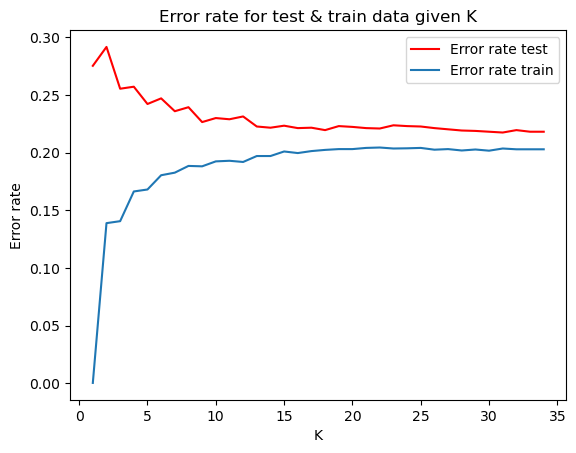

In [26]:
plt.plot(k_ranges, error_test,'r')
plt.plot(k_ranges, error_train)
plt.title('Error rate for test & train data given K')
plt.legend(['Error rate test','Error rate train'])
plt.xlabel('K')
plt.ylabel('Error rate')

according to the plot of the error rate we can see that k = 30 is the lowest point of the error rate in the test set.

In [27]:
# best K = 30
train_accuray = knn_accuracy(X_train,y_train,X_train,y_train,30)
test_accuracy = knn_accuracy(X_train,y_train,X_test,y_test,30)

In [28]:
train_accuray

0.7982486263736264

In [29]:
test_accuracy

0.7818055071453468

# Logistic Regression - implementation

Performs logistic regression using gradient descent optimization. 
It iteratively updates the weights and intercept based on the gradient of the cross-entropy loss. 
It also calculates the cost and accuracy at each iteration
optionally generating plots if is_plot is set to 1

In [30]:
# Sigmoid function
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Clip values to prevent overflow/underflow
    return 1 / (1 + np.exp(-z))

# cost function
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-5  # Small value to avoid division by zero
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Logistic Regression function
def logistic_regression(X, y, learning_rate, num_iterations, w0, weights, is_plot):
    num_samples, num_features = X.shape

    costs = []
    accuracy = []
    plot_iterations = [0, num_iterations // 2, num_iterations-1]
    plot_counter = 0

    # Gradient descent
    for i in range(num_iterations):
        z = np.dot(X, weights) + w0
        y_pred = sigmoid(z)

        dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
        dw0 = (1 / num_samples) * np.sum(y_pred - y)

        weights -= learning_rate * dw
        w0 -= learning_rate * dw0
        
        # Calculate current cross-entropy loss
        cost = cross_entropy_loss(y, y_pred)
        costs.append(cost)

        # Calculate the accuracy
        y_pred_class = (y_pred > 0.5).astype(int)
        y_acc = np.mean(y_pred_class == y)
        accuracy.append(y_acc)

        if is_plot == 1:
            #Plot ROC and confusion matrix
            if i in plot_iterations:
                plt.figure()
                print("Plot after {0} iterations:".format(i))
                plot_confusion_matrix(y, y_pred_class)
                plt.figure(figsize=(6, 4)) 
                plot_roc_curve(y, y_pred)
                plt.show()

                plot_counter += 1

    return weights, w0, costs, accuracy

# Logistic Regression Predict
def logistic_regression_predict(X, weights, w0):
    z = np.dot(X, weights) + w0
    y_pred = sigmoid(z)
    y_pred_class = (y_pred > 0.5).astype(int)
    return y_pred_class,y_pred



In [31]:
# function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = np.zeros((2, 2))
    for true, pred in zip(y_true, y_pred):
        cm[true, pred] += 1
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.GnBu)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['0', '1'])
    plt.yticks(tick_marks, ['0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(int(cm[i, j])), ha='center', va='center',
                     color="black")

# function for ploting the ROC 
def plot_roc_curve(y_true, y_pred):
    thresholds = np.arange(0, 1.01, 0.01)
    fpr = []
    tpr = []
    for threshold in thresholds:
        y_pred_class = (y_pred > threshold).astype(int)
        tn = np.sum((y_true == 0) & (y_pred_class == 0))
        fp = np.sum((y_true == 0) & (y_pred_class == 1))
        fn = np.sum((y_true == 1) & (y_pred_class == 0))
        tp = np.sum((y_true == 1) & (y_pred_class == 1))
        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')


Plot after 0 iterations:


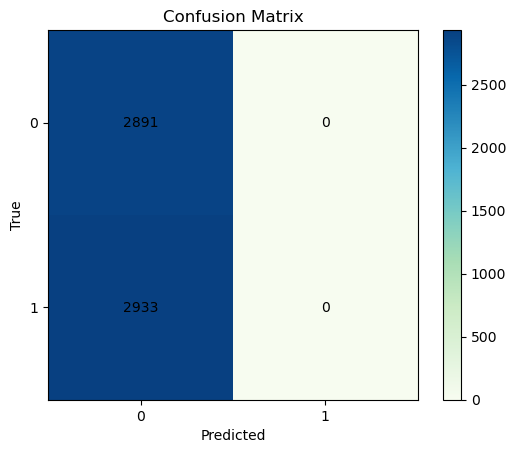

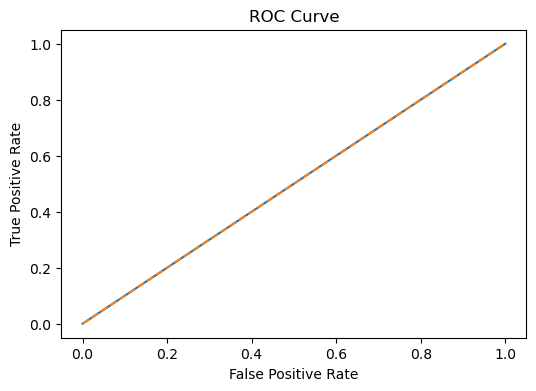

Plot after 250 iterations:


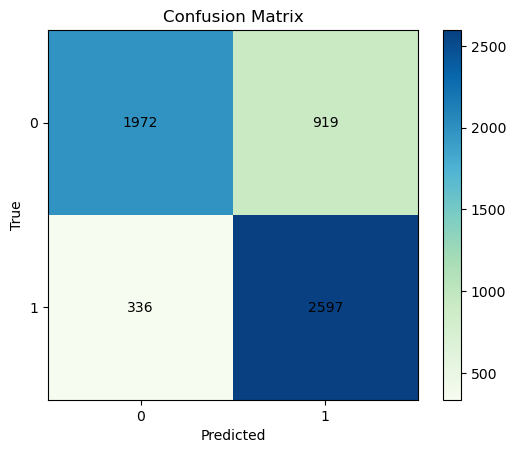

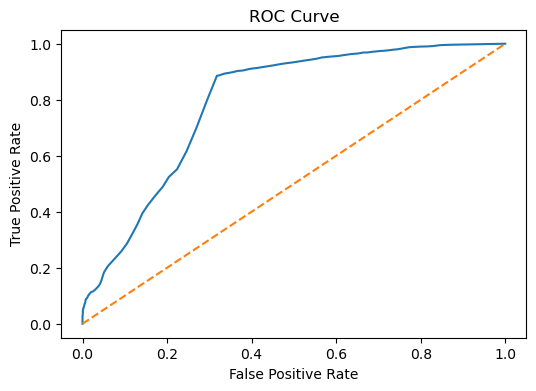

Plot after 499 iterations:


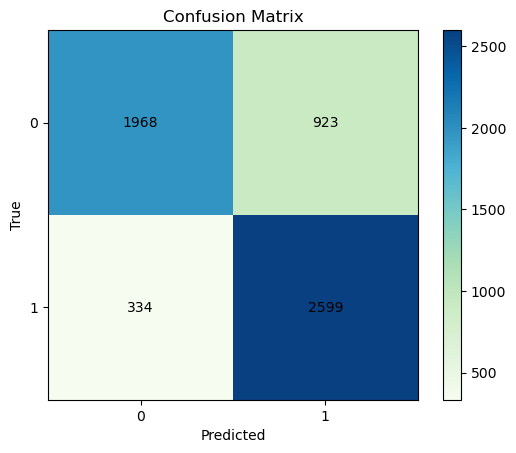

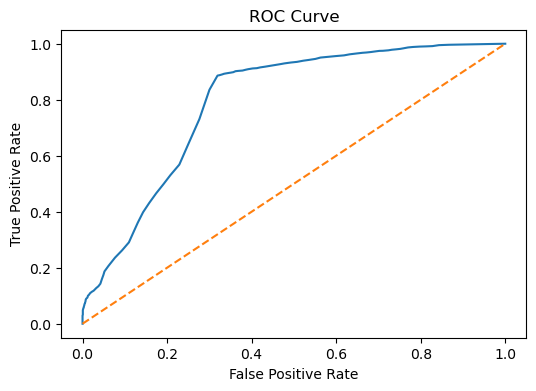

train accuracy
0.7841689560439561


test accuracy
0.7772743116068317


In [32]:
# Train the model and get weights, w0, costs, and accuracy
weights_0 = np.zeros(X_train.shape[1])
#weights_0 = np.random.rand(X_train.shape[1])*0.05
weights,w0,costs,accuracy=logistic_regression(X_train,y_train,0.000001,500,0,weights_0,1)
# Predict on train set
train_classifier ,y_pred_train = logistic_regression_predict(X_train, weights, w0)
train_acc = np.mean(train_classifier == y_train)
print("train accuracy")
print(train_acc)
print("\n")

# Predict on test set
test_classifier ,y_pred_test = logistic_regression_predict(X_test, weights, w0)
test_acc = np.mean(test_classifier == y_test)
print("test accuracy")
print(test_acc)



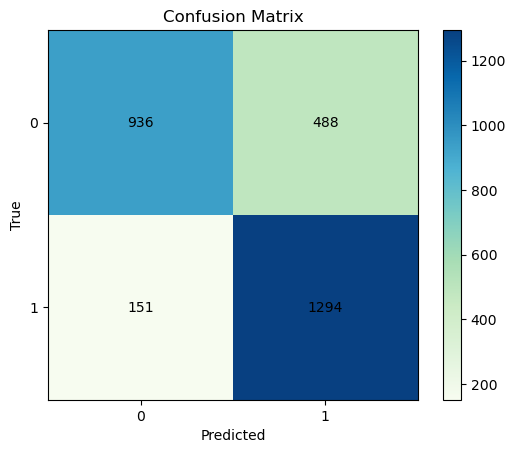

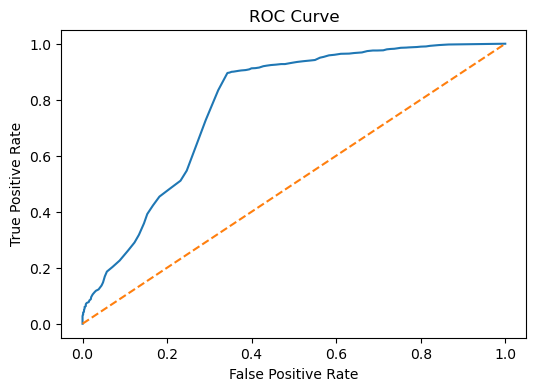

In [33]:
# test ROC and confusion matrix
plt.figure()
plot_confusion_matrix(y_test, test_classifier)
plt.figure(figsize=(6, 4)) 
plot_roc_curve(y_test, y_pred_test)
plt.show()


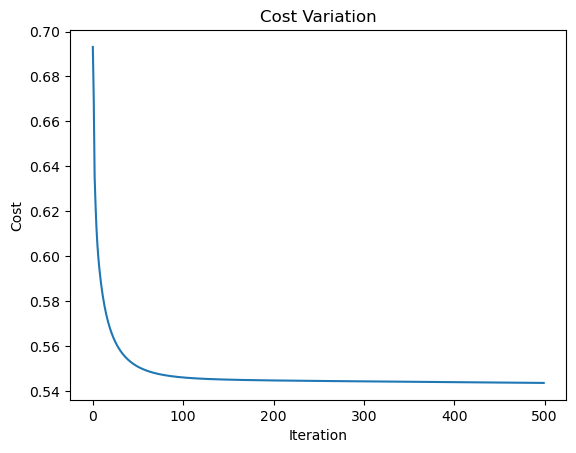

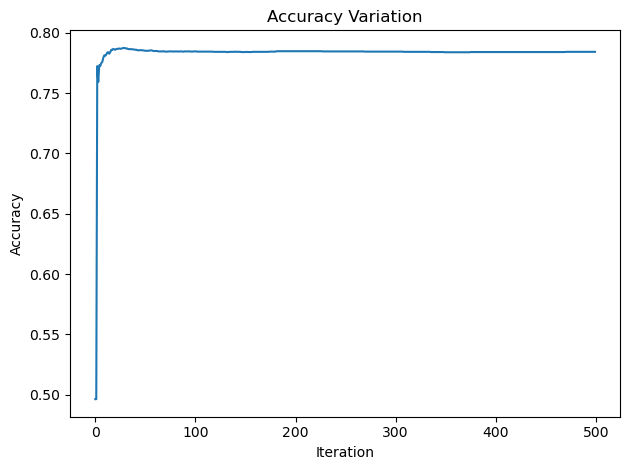

In [34]:
# Plot the cost (cross-entropy loss)
plt.figure()
plt.plot(range(len(costs)), costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Variation')

# Plot the accuracy

plt.figure()
plt.plot(range(len(accuracy)), accuracy)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy Variation')

# Adjust subplot spacing
plt.tight_layout()

# Display theplot
plt.show()

# The effects of w0 , learning rate and number of iterations on the logistic regression classifier



The number of iterations is a parameter that controls how many times the gradient descent algorithm will run. A small number of iterations may not allow the algorithm to converge to the optimal solution, while a large number of iterations may take too long to run.

(a) To choose the most compatible number of iterations, we started with a small number of iterations and then increased the number until the accuracy of the model stabled we also ploted the cost function to see when it converged.

(b) The learning rate (step size) is another parameter that controls how quickly the gradient descent algorithm will converge. A small learning rate will cause the algorithm to converge slowly, while a large learning rate may cause the algorithm to diverge. The optimal learning rate will depend on the dataset and the number of iterations.
Here are some examples - we can see that when the learning rate is too high (0.000009) the function has diverged, and in the second iteration even when the learning rate has a small value (0.00000001), 100 iterations is not enough time for the function to converge.

Learning Rate = 0.0009

train accuracy
0.6198489010989011
test accuracy
0.6047403276402927



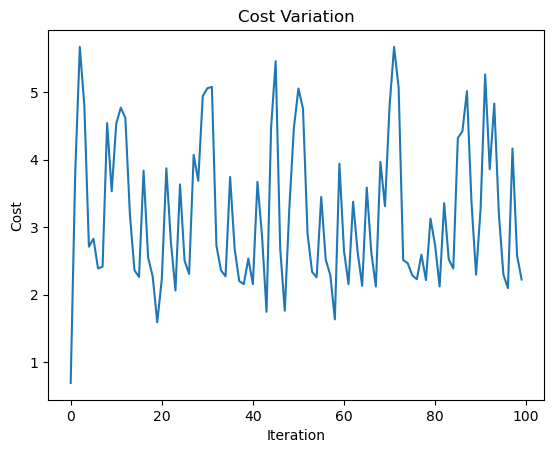

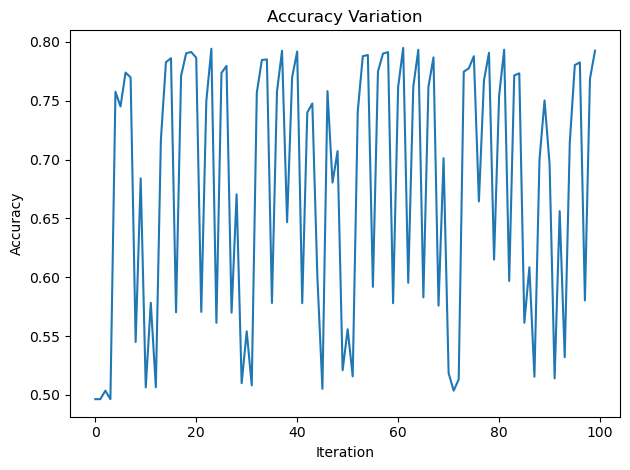

Learning Rate = 1e-08

train accuracy
0.5223214285714286
test accuracy
0.520738933426281



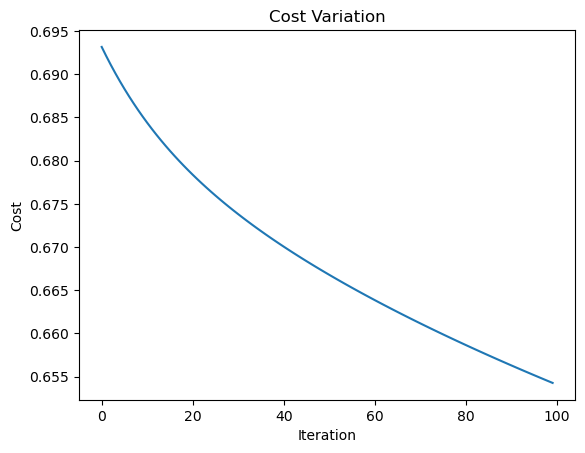

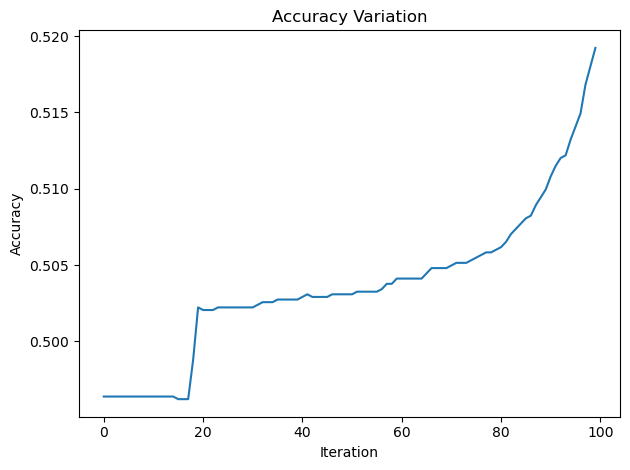

In [35]:
k = [0.0009,0.00000001]
weights_0 = np.zeros(X_train.shape[1])

for i in k:
    print("Learning Rate = {}\n".format(i))
    weights,w0,costs,accuracy=logistic_regression(X_train,y_train,i,100,0,weights_0,0)
    train_classifier ,y_pred_train = logistic_regression_predict(X_train, weights, w0)
    train_acc = np.mean(train_classifier == y_train)
    print("train accuracy")
    print(train_acc)
    # Predict on test set
    test_classifier ,y_pred_test = logistic_regression_predict(X_test, weights, w0)
    test_acc = np.mean(test_classifier == y_test)
    print("test accuracy")
    print(test_acc)
    print(""''''''"")
    plt.figure()
    plt.plot(range(len(costs)), costs)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost Variation')
    plt.figure()
    plt.plot(range(len(accuracy)), accuracy)
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Variation')
    plt.tight_layout()
    plt.show()
    weights_0 = np.zeros(X_train.shape[1])


(c) The values of w0 will affect the final weights of the logistic regression model. The weights will be shifted up or down depending on the values of w0 The value of the learning rate will also affect the final weights of the logistic regression model  A larger learning rate will cause the weights to change more quickly, while a smaller learning rate will cause the weights to change more slowly.
The plot shows that the cost function converges to the minimum in a different number of iterations, also we can see that the accuracy was negatively affected. The optimal accuracy we were able to find was at w0=0, and it was more accurate for 500 iterations and 0.000001 learning rate. 



w0 random values - Example num.1


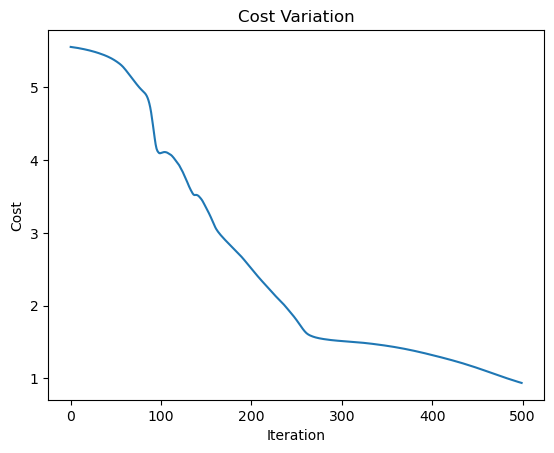

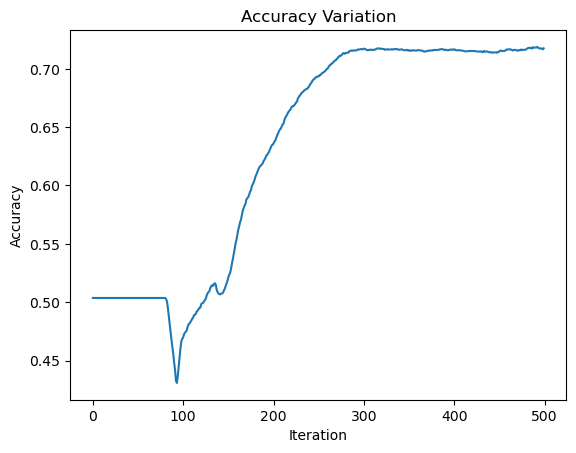

w0 random values - Example num.2


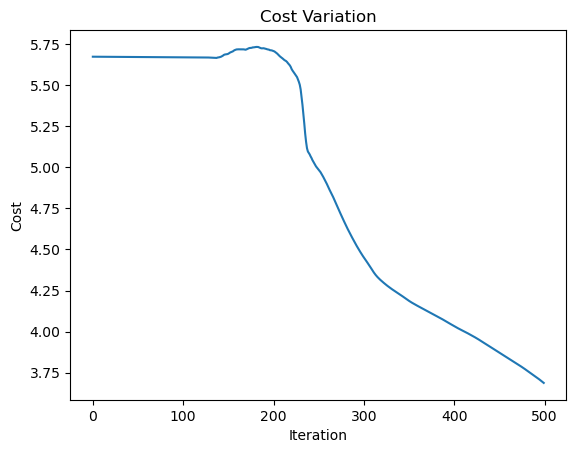

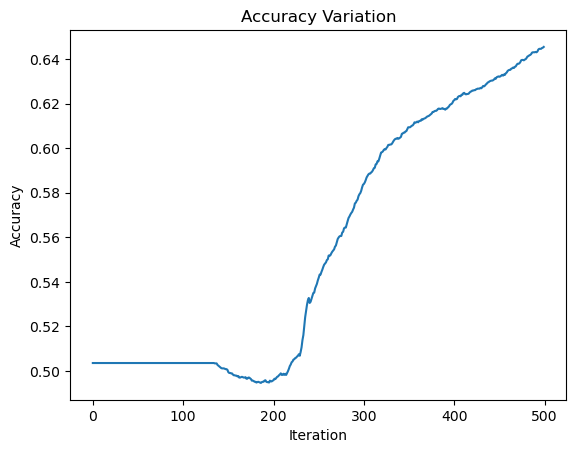

In [36]:
print("w0 random values - Example num.1")
w0 = 1
weights_0 = np.random.rand(X_train.shape[1])*0.1
weights,w, costs, accuracy = logistic_regression(X_train,y_train,0.000001,500,w0,weights_0,0)
plt.figure()
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Variation')
plt.figure()
plt.plot(range(len(accuracy)), accuracy)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy Variation')
plt.show()

print("w0 random values - Example num.2")
w0 = -0.1
weights_0 = np.random.rand(X_train.shape[1])*0.2
weights,w, costs, accuracy = logistic_regression(X_train,y_train,0.000001,500,w0,weights_0,0)
plt.figure()
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Variation')

plt.figure()
plt.plot(range(len(accuracy)), accuracy)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy Variation')
plt.show()


(d) We chose to split the data using sklearn.model_selection library with a 33% for the test set and 67% for the train set.
(e) We tried to split the data to 60-40% and also 80-20% and we saw minor differences so we decided to stay with 67-33%.
(f) The training error was not a reliable measure of the test error. When the learning algorithm performed well on the training set, it did not always perform well on the test set.

# Normalizing Features 

In [37]:
# Calculate the mean and standard deviation of each feature in the training set.
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

# Subtract the mean from each feature in the training set.
X_train_norm = X_train - mean

# Divide each feature in the training set by its standard deviation.
X_train_norm = X_train_norm / std

# Normalize the test set using the mean and standard deviation of the training set.
X_test_norm = (X_test - mean) / std


In [38]:
# training the algorithm with k=3 after normalization
train_accuray = knn_accuracy(X_train_norm,y_train,X_train_norm,y_train,3)
test_accuracy = knn_accuracy(X_train_norm,y_train,X_test_norm,y_test,3)


KNN:  K = 3

* Before normalization:

Train accuracy 0.859375

Test accuracy 0.7445102823283374

* After normalization:

Train accuracy: 0.8720810439560439

Test accuracy: 0.759149529452771



In [39]:
print("Train accuracy after normalization")
train_accuray

Train accuracy after normalization


0.8720810439560439

In [40]:
print("Test accuracy after normalization")
test_accuracy

Test accuracy after normalization


0.759149529452771

We can see that after normalization, the accuracy of the knn algorithm increased from 0.859375 to 0.8720810439560439.
It happened because feature normalization improves the performance of the KNN algorithm by bringing all features to a similar scale. It reduces bias towards features with larger scales and ensures each feature contributes equally. This allows KNN to capture patterns and similarities more effectively, leading to improved accuracy.

When the data is not normalized, some features may have a much larger range of values than others, which can make it difficult for the KNN algorithm to learn the relationships between the features and the target variable.

Plot after 0 iterations:


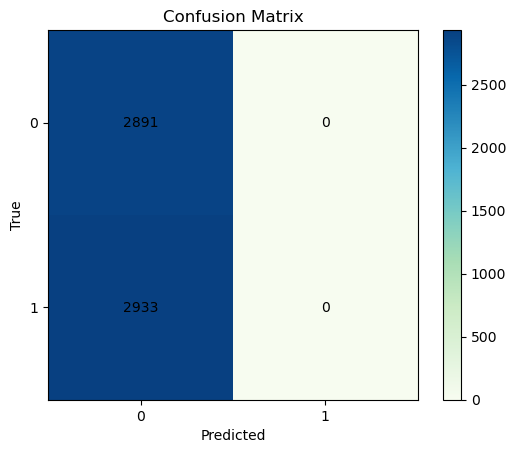

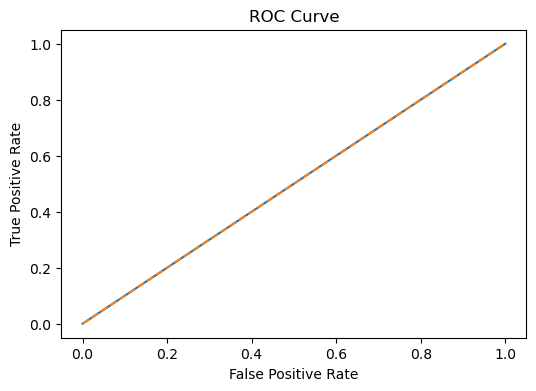

Plot after 125 iterations:


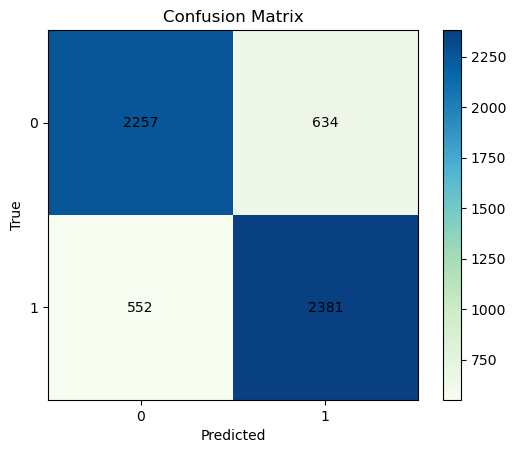

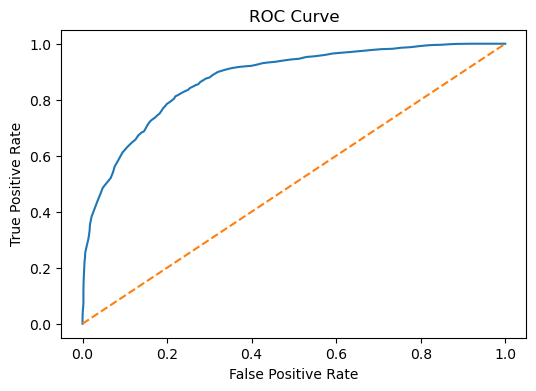

Plot after 249 iterations:


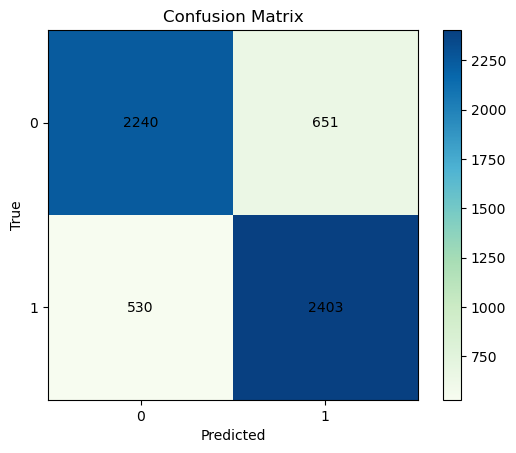

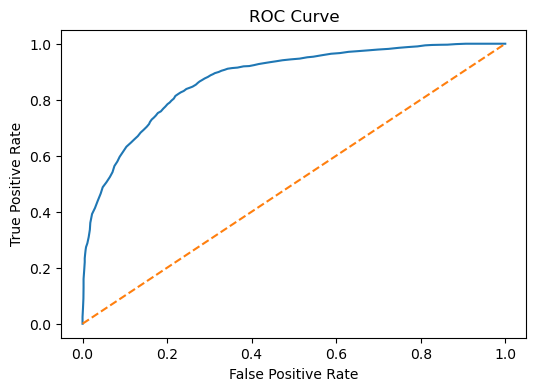

train accuracy
0.7973901098901099


test accuracy
0.7825026141512722


In [41]:
# Train the logistic regression classifier after normalization
weights_0 = np.zeros(X_train.shape[1])
weights,w0,costs,accuracy=logistic_regression(X_train_norm,y_train,0.9,250,0,weights_0,1)

# Predict on train set
train_classifier ,y_pred_train = logistic_regression_predict(X_train_norm, weights, w0)
train_acc = np.mean(train_classifier == y_train)
print("train accuracy")
print(train_acc)
print("\n")

# Predict on test set
test_classifier ,y_pred_test = logistic_regression_predict(X_test_norm, weights, w0)
test_acc = np.mean(test_classifier == y_test)
print("test accuracy")
print(test_acc)




Logistic Regression 

* Before normalization:

Train accuracy 0.7841689560439561

Test accuracy 0.7772743116068317

* After normalization:

Train accuracy: 0.7973901098901099

Test accuracy: 0.7825026141512722

We changed the learning rate from 0.000001 to 0.9 it helped us speed up the convergence of the algorithm,
and we were also able to change the number of iterations from 500 to 250.

The features in the dataset have different scales and large numerical values, they dominate the learning process, it causes the logistic regression algorithm to give more weight to those features leading to biased or inaccurate results.
By normalizing the features, all of them are brought to a similar scale, reducing the risk of one feature overpowering others.

We can see from the results that after applying normalization, both the train and test accuracies increased compared to the results obtained before normalization. This suggests that the logistic regression algorithm was able to learn more effectively from the normalized data.



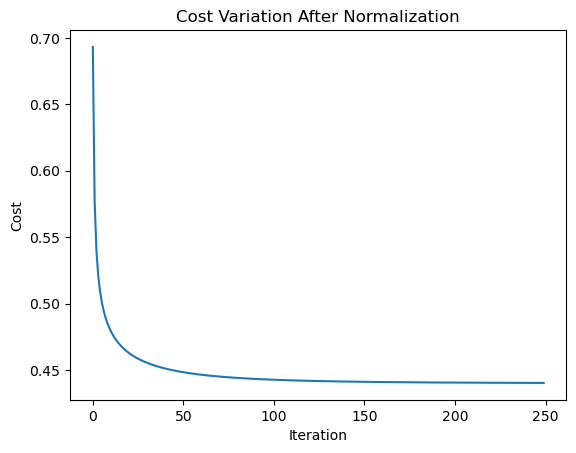

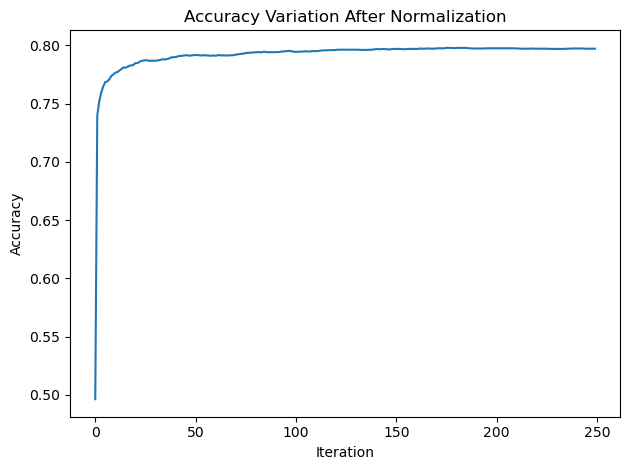

In [42]:
# Plot the cost (cross-entropy loss)
plt.figure()
plt.plot(range(len(costs)), costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Variation After Normalization')

# Plot the accuracy

plt.figure()
plt.plot(range(len(accuracy)), accuracy)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy Variation After Normalization')

# Adjust subplot spacing
plt.tight_layout()

# Display theplot
plt.show()

In [43]:

d = pd.DataFrame({
    "Algorithm": ["KNN = 3", "Logistic Regression"],
    "Train accuracy Before normalization": [0.859375, 0.7841689560439561],
    "Test accuracy Before normalization": [0.7445102823283374, 0.7772743116068317],
    "Train accuracy after normalization": [0.8720810439560439, 0.7973901098901099],
    "Test accuracy after normalization": [0.759149529452771, 0.7825026141512722]
})

d

,Algorithm,Train accuracy Before normalization,Test accuracy Before normalization,Train accuracy after normalization,Test accuracy after normalization
0,KNN = 3,0.859375,0.744510,0.872081,0.759150
1,Logistic Regression,0.784169,0.777274,0.797390,0.782503


Summary:

We have learned how to implement KNN and Logistic Regression algorithms ,the affects of w0 , learning rate and number of iterations on the logistic regression model.
We also learned that normalization of the data may help us get more accurate predictions while improving the run time of the algorithms in the process.

We managed to predict correctly 78% of the results in the logistic regression model, and 75%  in the KNN algorithm.